<a href="https://colab.research.google.com/github/Hurjiwon/lectures/blob/main/%ED%97%88%EC%A7%80%EC%9B%902021_%EA%B8%B0%EB%A7%90%ED%8F%89%EA%B0%80_BD%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
이름:허지원
학과:정보통신학부
학번:202055073
연락처:010-6391-5264

###**미션: 주택가격 예측**
###**데이터셋: 1)보스턴 주택가격, 2)캘리포니아 주택가격 데이터(california_housing_dataset)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **BD분석실습 기말평가**_12.14

* 시험일: 12월10일 
* 제출기한: 12월20일(월) 23시59분
* 참고자료: 첨부한 동영상 강의(12월7일 수업내용)

1. **미션**: 주택가격 예측 및 비교 
2. **데이터**
  * 1)보스톤 주택가격 데이터셋(**로드 데이터사용**)
  * 2)캘리포니아 주택가격 데이터셋(**로드 데이터 사용**)
3. **과제 내용**  
  * 1)보스톤 주택가격 특징 분석
  * 2)캘리포니아 주택가격 특징 분석
  * 3)회귀분석
  * 4)보스톤 주택가격과 캘리포니아 주택가격 특징 분석
4. **제출할 파일형식**: [.ipynb] 파일로 제출할 것
5. **제출방법**:추후공지(LMS가 복구될 경우 LMS, 안될 경우 구글미트) 


## 1 라이브러리

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 2 데이터

[scikit_learn_dataset 확인](https://scikit-learn.org/stable/modules/classes.html?highlight=data%20set#module-sklearn.datasets)

**데이터 로드 1**

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

In [ ]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

* data['data']에는 X 데이터, data['feature_names']에는 컬럼명.

In [ ]:
df1 = pd.DataFrame(data['data'], columns = data['feature_names'])

* Y 데이터인 price도 데이터프레임에 추가

In [ ]:
df1['MEDV'] = data['target']

In [ ]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Feature Description_보스톤 주택가격
- CRIM : 인근지역 범죄율
- ZN : 주거용 토지 비율(25,000평방피드 당)
- INDUS : 상업적 비즈니스에 활용되지 않는 농지 면적(비소매 비즈니스 면적비율)
- CHAS : 찰스강 더미(통로가 하천을 향하면 1, 그렇지 않으면 0)
- NOX : 산화 질소 농도(1,000만분의 1)
- RM : 평균 방 갯수
- AGE : 1940 년 이전에 건설된 자가 소유 점유 비율
- DIS : 5 개의 보스턴 고용 센터까지의 가중 거리(고용안정도)
- RAD : radial 고속도로와의 접근성 지수
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역별 학생-교사 비율
- LSTAT : 빈곤층의 비율(% lower status of the population)
- **MEDV : 해당 지역의 집값(중앙값; 1,000달러)**

**데이터 로드 2**

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()

In [ ]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

* data['data']: X 데이터, data['feature_names']: 컬럼명.

In [ ]:
df2 = pd.DataFrame(data['data'], columns = data['feature_names'])

* data['target']: 목표값, y 데이터 추가

In [ ]:
df2['MHV'] = data['target']

In [ ]:
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df2.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MHV           0
dtype: int64

#### Feature Description_캘리포니아 주택가격
- MedInc : 소득(중앙값)(median income in block group)
- HouseAge : 건축년수 중앙값(median house age in block group)
- AveRooms : 평균 방 수(average number of rooms per household)
- AveBedrms : 평균 침실수(average number of bedrooms per household)
- Population : 인구 수(block group population)
- AveOccup : 평균 가구원수(average number of household members)
- Latitude : 위도(block group latitude)
- Longitude : 경도(block group longitude)
- **MHV : 해당 지역의 집값(중앙값, 10만달러)**(median_house_value)

# **----------------------------------------------**

## 3 탐색적 데이터 분석(EDA: Exploratory Data Analysis)

In [ ]:
df1.shape

(506, 14)

In [ ]:
df2.shape

(20640, 9)

In [ ]:
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df2.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MHV           0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MHV         20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df1['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [ ]:
df2['MHV']. describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MHV, dtype: float64

In [ ]:
fig=plt.figure(figsize=(4,6))

<Figure size 288x432 with 0 Axes>

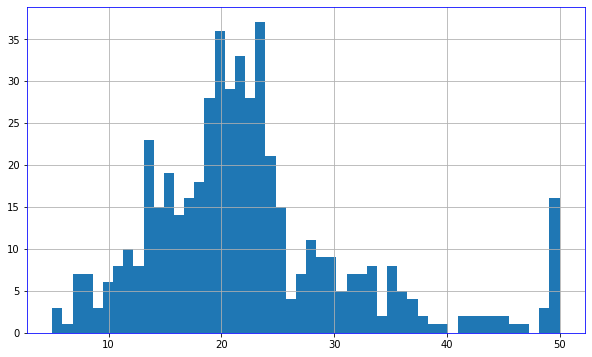

In [ ]:
df1['MEDV'].hist(bins=50)

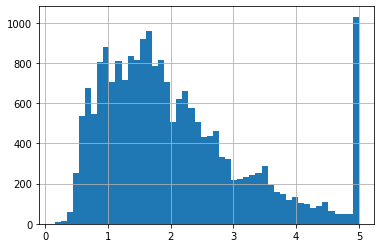

In [ ]:
df2['MHV'].hist(bins=50)

Text(0, 0.5, 'Number of Houses')

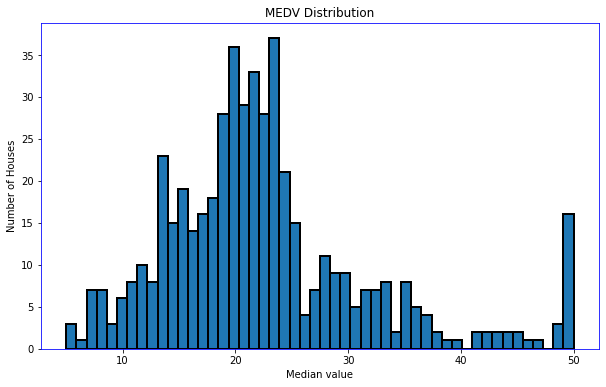

In [ ]:
plt.hist(df1['MEDV'], bins=50, edgecolor='k', linewidth=2);
plt.title('MEDV Distribution')
plt.xlabel('Median value')
plt.ylabel('Number of Houses')

Text(0, 0.5, 'Number of Houses')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


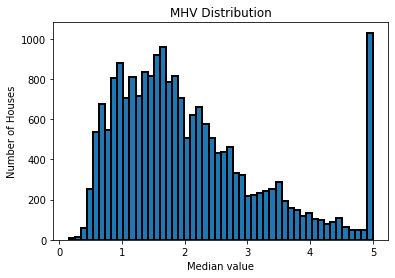

In [ ]:
plt.hist(df2['MHV'], bins=50, edgecolor='k', linewidth=2);
plt.title('MHV Distribution')
plt.xlabel('Median value')
plt.ylabel('Number of Houses')

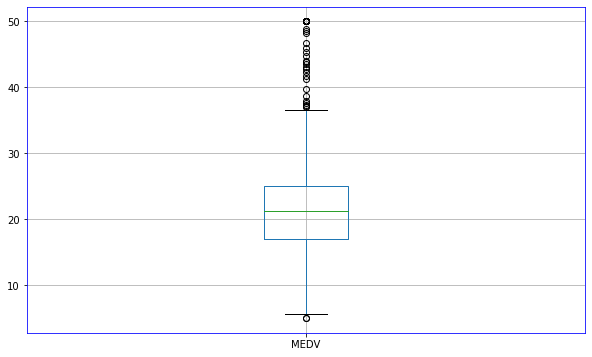

In [ ]:
df1.boxplot(column=['MEDV'])

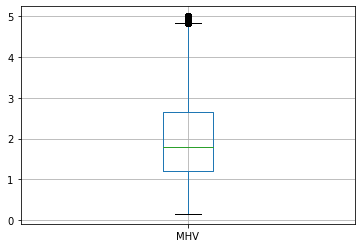

In [ ]:
df2.boxplot(column=['MHV'])

## 4 예측 분석 : 회귀분석

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as pltp

### 4.1 데이터 전처리

In [ ]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()      
scale_columns1 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
df1[scale_columns1] = scaler.fit_transform(df1[scale_columns1])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scale_columns2 = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
df2[scale_columns2]=scaler2.fit_transform(df2[scale_columns2])

In [ ]:
df1.head(5).round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.42,0.28,-1.29,0.0,-0.14,0.41,-0.12,0.14,-0.98,-0.67,-1.46,396.90,-1.08,24.0
1,-0.42,-0.49,-0.59,0.0,-0.74,0.19,0.37,0.56,-0.87,-0.99,-0.30,396.90,-0.49,21.6
2,-0.42,-0.49,-0.59,0.0,-0.74,1.28,-0.27,0.56,-0.87,-0.99,-0.30,392.83,-1.21,34.7
3,-0.42,-0.49,-1.31,0.0,-0.84,1.02,-0.81,1.08,-0.75,-1.11,0.11,394.63,-1.36,33.4
4,-0.41,-0.49,-1.31,0.0,-0.84,1.23,-0.51,1.08,-0.75,-1.11,0.11,396.90,-1.03,36.2


In [ ]:
df2.head(5).round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,2.34,0.98,0.63,-0.15,-0.97,-0.05,1.05,-1.33,4.53
1,2.33,-0.61,0.33,-0.26,0.86,-0.09,1.04,-1.32,3.58
2,1.78,1.86,1.16,-0.05,-0.82,-0.03,1.04,-1.33,3.52
3,0.93,1.86,0.16,-0.05,-0.77,-0.05,1.04,-1.34,3.41
4,-0.01,1.86,0.34,-0.03,-0.76,-0.09,1.04,-1.34,3.42


In [ ]:
from sklearn.model_selection import train_test_split

X1 = df1[scale_columns1]
y1 = df1['MEDV']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=40)

In [ ]:
from sklearn.model_selection import train_test_split

X2=df2[scale_columns2]
y2=df2['MHV']
X2_train, X2_test, y2_train, y2_test= train_test_split(X, y , test_size=0.2, random_state=40)

In [ ]:
X1_train.shape

(404, 11)

In [ ]:
X2_train.shape

(16512, 8)

In [ ]:
X1_test.shape

(102, 11)

In [ ]:
X2_test.shape

(4128, 8)

### 4.2 회귀 분석 모델 학습

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
lr1 = linear_model.LinearRegression(n_jobs=-1)
model1 = lr.fit(X1_train, y1_train)

print(lr.coef_)

[-1.20936764  0.99740024  0.0531556  -1.90019852  2.78044686 -0.02052262
 -2.87612079  2.55041345 -2.24560257 -1.98119609 -3.9722764 ]


In [ ]:
lr2 = linear_model.LinearRegression(n_jobs=-1)
model2 = lr.fit(X2_train, y2_train)

print(lr.coef_)

[ 0.81785148  0.1163606  -0.2449779   0.28221774 -0.00489432 -0.04772524
 -0.89941294 -0.86936972]


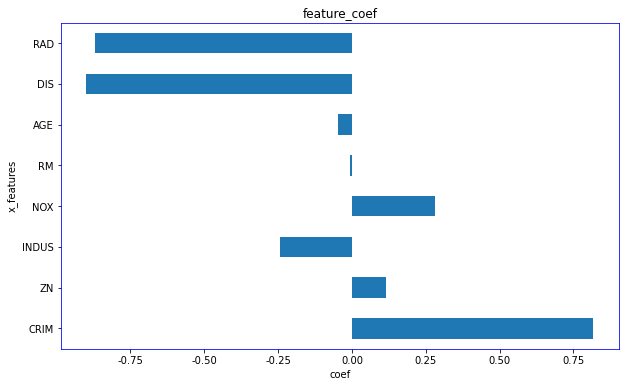

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.edgecolor'] = "b"   

plt.rcParams['figure.figsize'] = [10, 6]  

coefs = lr.coef_.tolist()                   
coefs_series = pd.Series(coefs)           

x_labels = scale_columns1
ax = coefs_series.plot.barh()
ax.set_title('feature_coef')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

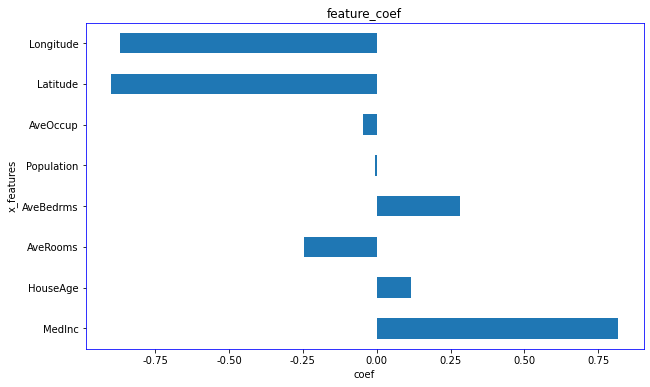

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.edgecolor'] = "b"   

plt.rcParams['figure.figsize'] = [10, 6]  

coefs = lr.coef_.tolist()                   
coefs_series = pd.Series(coefs)           

x_labels = scale_columns2
ax = coefs_series.plot.barh()
ax.set_title('feature_coef')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

### 4.3 학습 결과 해석

In [ ]:
import numpy as np

In [ ]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [ ]:
def mse(pred, actual):
    return((pred - actual)**2).mean()

In [ ]:
mse(pred, actual)

4.0

In [ ]:
def mae(pred, actual):
    return np.abs(pred - actual).mean()  

In [ ]:
mae(pred, actual)

2.0

In [ ]:
def rmse(pred, actual):
    return np.sqrt(mse(pred, actual))

In [ ]:
rmse(pred, actual)

2.0

In [ ]:
print(model1.score(X1_train, y1_train))  
print(model1.score(X1_test, y1_test))

0.7418728522647435
0.6794471986509734


In [ ]:
print(model2.score(X2_train, y2_train))  
print(model2.score(X2_test, y2_test))

0.6056066227644388
0.6075794091011186


#####4.3.1 유의성 검정

In [ ]:
import statsmodels.api as sm        
X1_train = sm.add_constant(X1_train)
model1 = sm.OLS(y1_train, X1_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     102.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.79e-108
Time:                        10:30:01   Log-Likelihood:                -1177.0
No. Observations:                 404   AIC:                             2378.
Df Residuals:                     392   BIC:                             2426.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2131      0.226     98.077      0.000      21.768      22.658
CRIM          -1.2094      0.355     -3.403      0.001      -1.908      -0.511
ZN             0.9974      0.337      2.961      0.003       0.335       1.660
INDUS          0.0532      0.449      0.118      0.906      -0.829       0.936
NOX           -1.9002      0.464     -4.092      0.000      -2.813      -0.987
RM             2.7804      0.318      8.732      0.000       2.154       3.406
AGE           -0.0205      0.399     -0.051      0.959      -0.806       0.765
DIS           -2.8761      0.439     -6.545      0.000      -3.740      -2.012
RAD            2.5504      0.601      4.240      0.000       1.368       3.733
TAX           -2.2456      0.644     -3.487      0.001      -3.512      -0.980
PTRATIO       -1.9812      0.300     -6.609      0.000      -2.571      -1.392
LSTAT         -3.9723      0.412     -9.642      0.000      -4.782      -3.162
==============================================================================
Omnibus:                      174.034   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1045.538
Skew:                           1.741   Prob(JB):                    9.21e-228
Kurtosis:                      10.070   Cond. No.                         9.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm        
X2_train = sm.add_constant(X2_train)
model2 = sm.OLS(y2_train, X2_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MHV   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     3168.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:30:16   Log-Likelihood:                -18034.
No. Observations:               16512   AIC:                         3.609e+04
Df Residuals:                   16503   BIC:                         3.616e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0635      0.006    367.497      0.000       2.052       2.074
MedInc         0.8179      0.009     92.695      0.000       0.801       0.835
HouseAge       0.1164      0.006     18.560      0.000       0.104       0.129
AveRooms      -0.2450      0.016    -15.315      0.000      -0.276      -0.214
AveBedrms      0.2822      0.014     19.465      0.000       0.254       0.311
Population    -0.0049      0.006     -0.825      0.409      -0.017       0.007
AveOccup      -0.0477      0.009     -5.250      0.000      -0.066      -0.030
Latitude      -0.8994      0.017    -52.571      0.000      -0.933      -0.866
Longitude     -0.8694      0.017    -51.710      0.000      -0.902      -0.836
==============================================================================
Omnibus:                     3532.710   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11373.055
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       6.438   Cond. No.                         6.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####4.3.2 다중 공선성

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()                          
vif1["VIF Factor"] = [variance_inflation_factor(X1_train.values, i) for i in range(X1_train.shape[1])]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()                          
vif2["VIF Factor"] = [variance_inflation_factor(X2_train.values, i) for i in range(X2_train.shape[1])]

In [ ]:
vif1["features"] = X1_train.columns
vif1.round(1)

,VIF Factor,features
0,1.0,const
1,1.8,CRIM
2,2.3,ZN
3,4.0,INDUS
4,4.3,NOX
5,1.8,RM
6,3.2,AGE
7,3.9,DIS
8,6.8,RAD
9,8.0,TAX


In [ ]:
vif2["features"] = X2_train.columns
vif2.round(1)

,VIF Factor,features
0,1.0,const
1,2.5,MedInc
2,1.2,HouseAge
3,9.0,AveRooms
4,7.7,AveBedrms
5,1.1,Population
6,1.0,AveOccup
7,9.3,Latitude
8,9.0,Longitude


## 5.보고서

1. 그래프를 통해 확인해 보았을 때,  보스턴 주택 가격은 DIS(5 개의 보스턴 고용 센터까지의 가중 거리(고용안정도)),
RAD(radial 고속도로와의 접근성 지수),
INDUS(상업적 비즈니스에 활용되지 않는 농지 면적(비소매 비즈니스 면적비율),
AGE(1940 년 이전에 건설된 자가 소유 점유 비율),
RM(평균 방 갯수) 순으로 영향을 미치지 않고,

 반면, ZN(주거용 토지 비율(25,000평방피드 당)),
NOX(산화 질소 농도(1,000만분의 1))으로 영향을 미치며  CRIM(인근지역 범죄율) 이 가장 주택 가격에 영향을 끼치는 것으로 보인다.

2. 그래프를 통해 확인해 보았을 때, 캘리포니아 주택 가격은 Latitude(위도), Longtitude(경도),AveRooms(평균 방 수), AveOccup(평균 가구원수), Population(인구 수) 순으로 주택 가격에 영향을 미치지 않는 것으로 보인다. 

 반면 HouseAge(건축년수 중앙값), AveBedms(평균 침실수) 순으로 영향을 미치며 Medlnc(소득)이 주택 가격에 가장 큰 영향끼치는 것으로 판단된다.

**-----------------------------------------------------**

## **한 학기 동안 수고 많았습니다.** 
## **굿럭!!!**